<a href="https://colab.research.google.com/github/giacomoaccursi/DataIntensiveExercises/blob/main/Strokes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve
def download(file, url):
    if not os.path.isfile(file):
        urlretrieve(url, file)


In [ ]:
download("stroke.csv", "https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/cec0340503d82d270821e03254993b6dede60afb/healthcare-dataset-stroke-data.csv")

In [ ]:
data = pd.read_csv("stroke.csv")

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
data["stroke"].mean()

0.0487279843444227

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


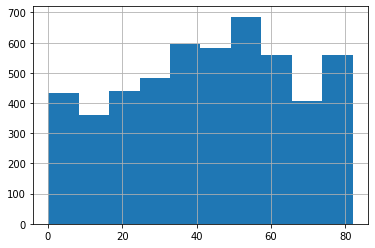

In [ ]:
data["age"].hist()

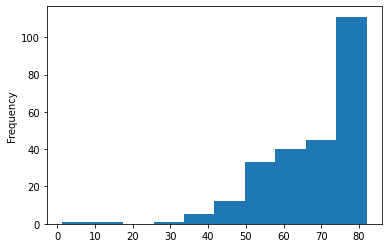

In [ ]:
data[data["stroke"] == 1]["age"].plot.hist()

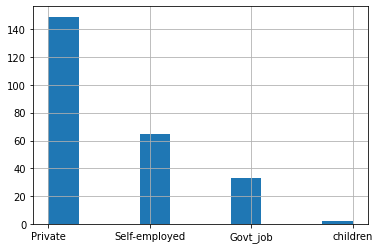

In [ ]:
data[data["stroke"] == 1]["work_type"].hist()

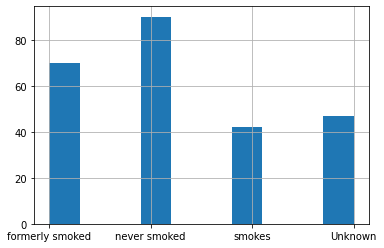

In [ ]:
data[data["stroke"] == 1]["smoking_status"].hist()

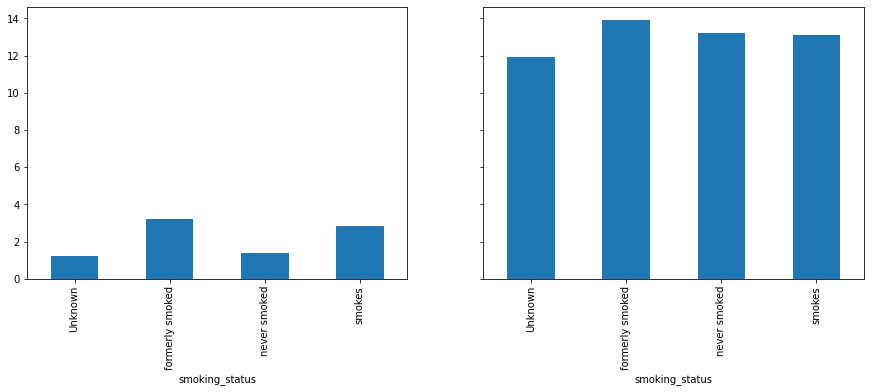

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
((data[data["age"] < 60].groupby("smoking_status")["stroke"].mean())*100).plot.bar(ax=axes[0])
((data[data["age"] >= 60].groupby("smoking_status")["stroke"].mean())*100).plot.bar(ax=axes[1])

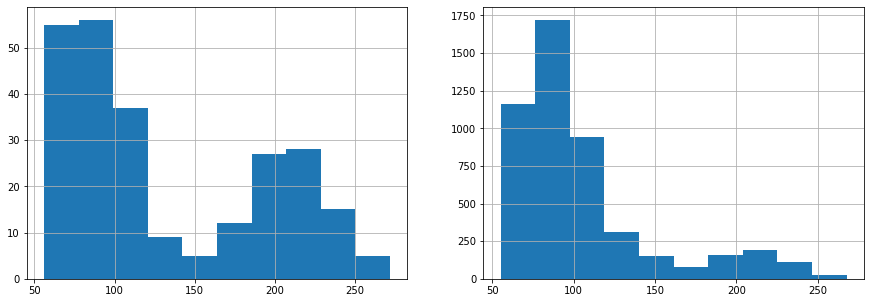

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

data[data["stroke"] == 1]["avg_glucose_level"].hist(ax=axes[0])
data[data["stroke"] == 0]["avg_glucose_level"].hist(ax=axes[1])

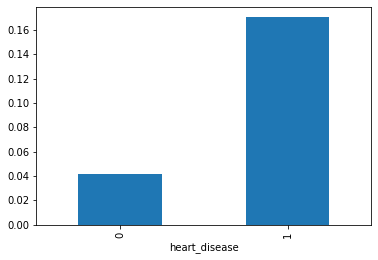

In [ ]:
data.groupby("heart_disease")["stroke"].mean().plot.bar()

## Data Processing

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
bmi_std = data["bmi"].std()
bmi_mean = data["bmi"].mean()

In [ ]:
null_bmi = data[data["bmi"].isnull()]["bmi"]
null_bmi_number = data["bmi"].isnull().sum()

In [ ]:
random_bmi = np.random.randint(low=bmi_mean - bmi_std, high=bmi_mean + bmi_std, size = null_bmi_number)

In [ ]:
data["bmi"][data["bmi"].isnull()] = random_bmi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data = data.drop("id", axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(random_state = 42, categorical_features=[0, 4, 5, 6, 9])
X = data.drop("stroke", axis =1)
X_col = X.columns
y = data["stroke"]
X, y = smote.fit_resample(X, y)
X = pd.DataFrame(X, columns=X_col)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
data["age"] = data["age"].astype(int)
data["avg_glucose_level"] = data["avg_glucose_level"].astype(int)
data["bmi"] = data["bmi"].astype(int)

In [ ]:
X["age"] = X["age"].astype(int)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.utils import to_categorical
ohe = OneHotEncoder(sparse=False)

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]), 
    (StandardScaler(), ["age", "avg_glucose_level", "bmi"])
)

In [ ]:
X = column_trans.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
kf = KFold(4, shuffle=True, random_state=42)

In [ ]:
model = Pipeline([
                  ("poly", PolynomialFeatures(degree = 2, include_bias=False)), 
                  ("logreg", LogisticRegression())
])

In [ ]:
model = cross_validate(model, X_train, y_train, cv = kf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
model["test_score"].mean()

0.8163879178376403

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
yc_train = to_categorical(y_train)
yc_test = to_categorical(y_test)

In [ ]:
model = Sequential([
  Dense(32, activation = "relu", input_dim = X.shape[1]),
  Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics = ["accuracy"]
)

In [ ]:
model.fit(X_train, yc_train, batch_size=10, epochs=100)

Epoch 1/100
649/649 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7142
Epoch 2/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8072
Epoch 3/100
649/649 [==============================] - 1s 1ms/step - loss: 0.4045 - accuracy: 0.8069
Epoch 4/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3871 - accuracy: 0.8249
Epoch 5/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3692 - accuracy: 0.8365
Epoch 6/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3629 - accuracy: 0.8419
Epoch 7/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3687 - accuracy: 0.8383
Epoch 8/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8402
Epoch 9/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3502 - accuracy: 0.8541
Epoch 10/100
649/649 [==============================] - 1s 1ms/step - loss: 0.3478 - accura

In [ ]:
model.evaluate(X_test, yc_test, batch_size=20)

163/163 [==============================] - 0s 894us/step - loss: 0.3130 - accuracy: 0.8821


[0.31296780705451965, 0.8821351528167725]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_model.score(X_test, y_test)

0.9385991977784635